In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %cd /content/drive/My\ Drive/pied-paper

/content/drive/My Drive/pied-paper


In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

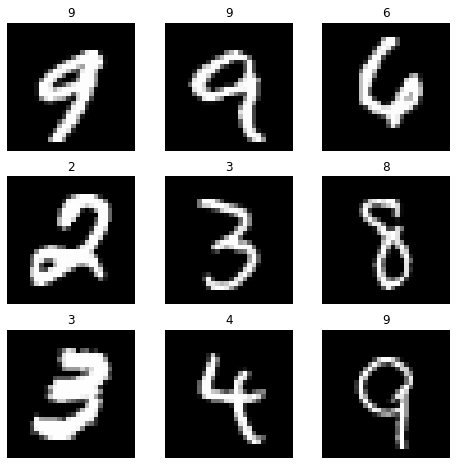

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
next(iter(train_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

In [8]:
train_features, train_labels = next(iter(train_dataloader))

In [9]:
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


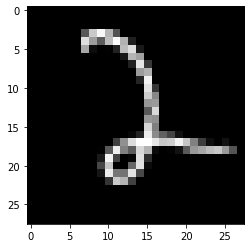

Label: 2


In [10]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [11]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear = nn.Linear(28*28, 10)
  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
device="cpu"
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
print(model)

MLP(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.25
	Epoch 0 | Batch 100 | Loss   0.85
	Epoch 0 | Batch 200 | Loss   0.56
	Epoch 0 | Batch 300 | Loss   0.46
	Epoch 0 | Batch 400 | Loss   0.48
	Epoch 0 | Batch 500 | Loss   0.45
	Epoch 0 | Batch 600 | Loss   0.33
	Epoch 0 | Batch 700 | Loss   0.38
	Epoch 0 | Batch 800 | Loss   0.30
	Epoch 0 | Batch 900 | Loss   0.35
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.54
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.20
	Epoch 1 | Batch 100 | Loss   0.32
	Epoch 1 | Batch 200 | Loss   0.46
	Epoch 1 | Batch 300 | Loss   0.40
	Epoch 1 | Batch 400 | Loss   0.21
	Epoch 1 | Batch 500 | Loss   0.21
	Epoch 1 | Batch 600 | Loss   0.17
	Epoch 1 | Batch 700 | Loss   0.27
	Epoch 1 | Batch 800 | Loss   0.34
	Epoch 1 | Batch 900 | Loss   0.28
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.32
Batch num: 0
Input d

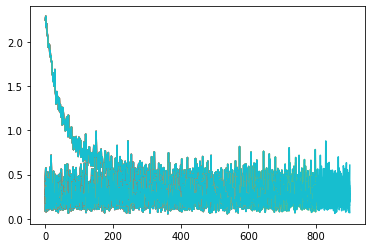

In [ ]:
epochs = 10
batch_size = 64

model.train()

losses = []
for epoch in range(epochs):

  for batch_num, input_data in enumerate(train_dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device).float()
    y = y.to(device)

    output = model(x.reshape(-1, 28*28))
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
plt.plot(losses)

In [ ]:
model(next(iter(train_dataloader))[0].reshape(batch_size, 28*28))[0]

tensor([ -0.9533,  -8.7074,  -1.3367,  -3.1969,  -3.4673,   1.1377,   5.6897,
        -10.4101,  -4.7547,  -8.1984], grad_fn=<SelectBackward0>)

In [ ]:
import csv
model.eval()

with open('mlp_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x[0].to(device).float()

            output = model(x.reshape(-1, 28*28)).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ[0].reshape(1,))

            num += 1
            predictions.append(torch.equal(output, y_targ[0].reshape(1,)))
        
        accuracy = sum(predictions) / len(predictions)
        print(f"Length of predictions: {len(predictions)}")
        print(f"Accuracy : {accuracy}")
        

tensor([5])
tensor([5])
tensor([9])
tensor([3])
tensor([9])
tensor([9])
tensor([9])
tensor([9])
tensor([2])
tensor([2])
Length of predictions: 157
Accuracy : 0.9299363057324841


In [ ]:
True+True

2

CNN

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.seq = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1),
        nn.ReLU(),
    )
    self.linear = nn.Linear(8*28*28, 10)
  def forward(self, x):
    seq = self.seq(x)
    res = seq.reshape(-1, 8*28*28)
    out = self.linear(res)
    return out

In [ ]:
x, y = next(iter(train_dataloader))
print(x.shape)
print(y.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
device = 'cpu'
cnn_model = CNN().to(device)
print(cnn_model)
optimizer = torch.optim.Adam(cnn_model.parameters())
criterion = nn.CrossEntropyLoss()

CNN(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (linear): Linear(in_features=6272, out_features=10, bias=True)
)


In [ ]:
cnn_model(x).shape

torch.Size([64, 10])

Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.30
	Epoch 0 | Batch 100 | Loss   0.28
	Epoch 0 | Batch 200 | Loss   0.17
	Epoch 0 | Batch 300 | Loss   0.37
	Epoch 0 | Batch 400 | Loss   0.31
	Epoch 0 | Batch 500 | Loss   0.22
	Epoch 0 | Batch 600 | Loss   0.09
	Epoch 0 | Batch 700 | Loss   0.08
	Epoch 0 | Batch 800 | Loss   0.08
	Epoch 0 | Batch 900 | Loss   0.05
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.22
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.07
	Epoch 1 | Batch 100 | Loss   0.10
	Epoch 1 | Batch 200 | Loss   0.14
	Epoch 1 | Batch 300 | Loss   0.01
	Epoch 1 | Batch 400 | Loss   0.01
	Epoch 1 | Batch 500 | Loss   0.02
	Epoch 1 | Batch 600 | Loss   0.04
	Epoch 1 | Batch 700 | Loss   0.30
	Epoch 1 | Batch 800 | Loss   0.21
	Epoch 1 | Batch 900 | Loss   0.07
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.07
Batch num: 0
Input d

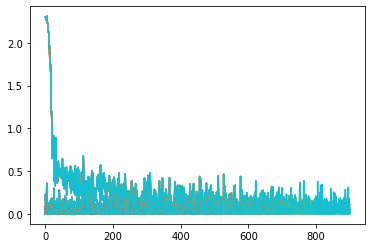

In [ ]:
epochs = 10
batch_size = 64

losses = []
cnn_model.train()
for epoch in range(epochs):
  for batch_num, input_data in enumerate(train_dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device).float()
    y = y.to(device)

    output = cnn_model(x)
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
plt.plot(losses)

In [29]:
print(len(train_dataloader))
print(len(test_dataloader))

938
157


In [ ]:
import csv
cnn_model.eval()

with open('cnn_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x.to(device).float()

            output = cnn_model(x).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ)

            num += 1
            predictions.append(torch.eq(output, y_targ))
        
        print(predictions[0])
        print(predictions[0].shape)
        print(sum(predictions[:2]))
        print(len(predictions))
        tot_sum = 0
        tot_len = 0
        for tensor in predictions:
          tot_sum += sum(tensor)
          tot_len += len(tensor)
        accuracy = tot_sum / tot_len
        print(f"Length of predictions: {tot_len}")
        print(f"Accuracy : {accuracy}")
        

tensor([1, 9, 6, 4, 7, 5, 3, 8, 8, 7, 4, 6, 4, 0, 4, 6, 9, 8, 2, 8, 7, 7, 8, 3,
        8, 4, 8, 6, 2, 5, 2, 3, 6, 6, 1, 3, 3, 0, 4, 9, 0, 4, 5, 7, 8, 8, 9, 5,
        9, 9, 2, 6, 8, 8, 2, 5, 5, 6, 9, 4, 4, 6, 4, 5])
tensor([1, 9, 6, 4, 7, 5, 3, 8, 8, 7, 4, 6, 4, 0, 4, 6, 9, 8, 2, 8, 7, 7, 8, 3,
        8, 4, 8, 6, 2, 5, 2, 3, 6, 6, 1, 3, 3, 0, 4, 9, 0, 4, 5, 7, 8, 8, 9, 5,
        9, 9, 2, 6, 8, 8, 2, 5, 5, 6, 9, 4, 4, 6, 4, 5])
tensor([8, 9, 2, 9, 3, 1, 2, 7, 8, 8, 2, 0, 1, 5, 8, 5, 9, 0, 8, 1, 1, 8, 9, 8,
        0, 9, 9, 3, 7, 8, 2, 3, 4, 6, 4, 2, 4, 6, 5, 8, 7, 9, 3, 0, 4, 9, 5, 5,
        3, 0, 1, 9, 0, 2, 0, 6, 9, 1, 9, 3, 1, 7, 0, 0])
tensor([8, 9, 2, 9, 3, 1, 2, 7, 8, 8, 2, 0, 1, 5, 8, 5, 9, 0, 8, 1, 1, 8, 9, 8,
        0, 9, 9, 3, 7, 8, 2, 3, 4, 6, 4, 2, 4, 6, 5, 8, 7, 9, 3, 0, 4, 9, 5, 5,
        3, 0, 1, 9, 0, 2, 0, 6, 9, 1, 9, 3, 1, 7, 0, 0])
tensor([0, 8, 4, 1, 3, 2, 5, 5, 0, 9, 8, 1, 9, 5, 9, 2, 5, 7, 4, 5, 2, 3, 0, 2,
        0, 6, 3, 5, 7, 2, 6, 6, 4, 0, 3, 3, 7, 1, 7,

RNN

In [30]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.sequence_length = 28
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.num_classes = num_classes
    self.samp_num = 0

    self.rnn = nn.RNN(self.input_size, self.hidden_size, self.num_layers, batch_first = True)  
    self.linear = nn.Linear(self.hidden_size, self.num_classes)
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

    out, _ = self.rnn(x, h0)
    if self.samp_num % 1000 == 0:
      print(f"RNN output: {out.shape}")
    out = out[:, -1, :]
    if self.samp_num % 1000 == 0:
      print(f"Reshaped RNN output: {out.shape}")

    self.samp_num += 1

    out = self.linear(out)
    return out

In [31]:
input_size = 28
sequence_length = 28
hidden_size = 128
num_layers = 1
num_classes = 10

In [32]:
device = 'cpu'
rnn_model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(rnn_model.parameters())
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
criterion = nn.CrossEntropyLoss()

tot_acc = None

In [33]:
print(rnn_model)

RNN(
  (rnn): RNN(28, 128, batch_first=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)


In [34]:
batch_num, input_data = next(enumerate(train_dataloader))
x, y = input_data
print(batch_num)
print(x.shape)
print(y)

0
torch.Size([64, 1, 28, 28])
tensor([1, 9, 1, 2, 7, 6, 5, 7, 7, 4, 8, 0, 1, 1, 3, 1, 4, 3, 7, 4, 4, 2, 1, 6,
        4, 9, 6, 1, 4, 7, 1, 6, 0, 8, 6, 8, 7, 3, 2, 0, 6, 1, 8, 6, 8, 3, 5, 7,
        2, 5, 3, 3, 3, 3, 4, 1, 6, 8, 8, 6, 1, 6, 8, 1])


In [35]:
def rnn_train(model, dataloader, device):
  model.train()
  losses = []
  for batch_num, input_data in enumerate(dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device)
    y = y.to(device)

    output = model(x.reshape(-1, 28, 28))
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
  plt.plot(losses)

In [36]:
def rnn_evaluate(model, dataloader, device):

  model.eval()

  with torch.no_grad():
    predictions = []
    for x, y_targ in dataloader:
      x = x.to(device)
      y_targ = y_targ.to(device)

      output = model(x.reshape(-1, 28, 28)).argmax(dim=1)
      predictions.append(torch.eq(output, y_targ))

      tot_sum = 0
      tot_len = 0

      for tensor in predictions:
        tot_sum += sum(tensor)
        tot_len += len(tensor)
      accuracy = tot_sum / tot_len

      print(f"Total number of predictions: {tot_len}")
      print(f"Total accuracy: {accuracy}")

      return accuracy

Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
RNN output: torch.Size([64, 28, 128])
Reshaped RNN output: torch.Size([64, 128])
	Epoch 0 | Batch 0 | Loss   2.30
	Epoch 0 | Batch 100 | Loss   1.09
	Epoch 0 | Batch 200 | Loss   0.94
	Epoch 0 | Batch 300 | Loss   0.71
	Epoch 0 | Batch 400 | Loss   0.60
	Epoch 0 | Batch 500 | Loss   0.59
	Epoch 0 | Batch 600 | Loss   0.58
	Epoch 0 | Batch 700 | Loss   0.49
	Epoch 0 | Batch 800 | Loss   0.37
	Epoch 0 | Batch 900 | Loss   0.32
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.75
Total number of predictions: 64
Total accuracy: 0.828125
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.39
RNN output: torch.Size([64, 28, 128])
Reshaped RNN output: torch.Size([64, 128])
	Epoch 1 | Batch 100 | Loss   0.49
	Epoch 1 | Batch 200 | Loss   0.32
	Epoch 1 | Batch 300 | Loss   0.60
	Epoch 1 | Batch 400 | Loss   0.40
	Epoch 1 | Batch 500 | Loss   0.25
	Epoch 1 | Batch 600 | L

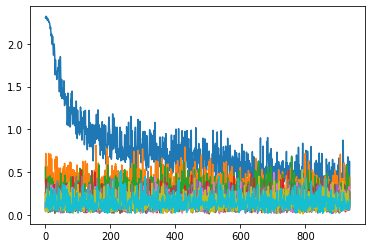

In [37]:
epochs = 10
batch_size = 64

for epoch in range(epochs):
  rnn_train(rnn_model, train_dataloader, device)
  accuracy = rnn_evaluate(rnn_model, test_dataloader, device)
  if tot_acc is not None and tot_acc > accuracy:
    scheduler.step()
  else:
    tot_acc = accuracy

Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.31
	Epoch 0 | Batch 100 | Loss   1.29
	Epoch 0 | Batch 200 | Loss   0.90
	Epoch 0 | Batch 300 | Loss   0.91
	Epoch 0 | Batch 400 | Loss   0.60
	Epoch 0 | Batch 500 | Loss   0.54
	Epoch 0 | Batch 600 | Loss   0.42
	Epoch 0 | Batch 700 | Loss   0.82
	Epoch 0 | Batch 800 | Loss   0.36
	Epoch 0 | Batch 900 | Loss   0.54
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.78
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.37
	Epoch 1 | Batch 100 | Loss   0.41
	Epoch 1 | Batch 200 | Loss   0.49
	Epoch 1 | Batch 300 | Loss   0.33
	Epoch 1 | Batch 400 | Loss   0.26
	Epoch 1 | Batch 500 | Loss   0.34
	Epoch 1 | Batch 600 | Loss   0.40
	Epoch 1 | Batch 700 | Loss   0.22
	Epoch 1 | Batch 800 | Loss   0.34
	Epoch 1 | Batch 900 | Loss   0.25
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.56
Batch num: 0
Input d

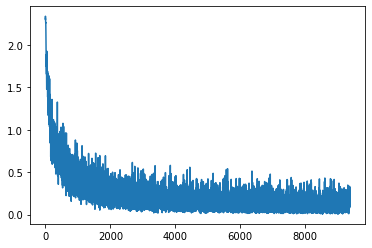

In [17]:
# epochs = 10
# batch_size = 64

# rnn_model.train()

# losses = []
# for epoch in range(epochs):
#   for batch_num, input_data in enumerate(train_dataloader):
#     if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
#       print(f"Batch num: {batch_num}")
#       print(f"Input data shape: {input_data[0].shape}")
#     else:
#       pass
    
#     optimizer.zero_grad()
#     x, y = input_data
#     x = x.to(device).float()
#     y = y.to(device)

#     output = rnn_model(x.reshape(-1, 28, 28))
#     loss = criterion(output, y)
#     loss.backward()
#     losses.append(loss.item())

#     optimizer.step()

#     if batch_num % 100 == 0:
#       print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
#   print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
# plt.plot(losses)


In [18]:
import csv
rnn_model.eval()

with open('cnn_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x.to(device).float()

            output = rnn_model(x.reshape(-1, 28, 28)).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ)

            num += 1
            predictions.append(torch.eq(output, y_targ))
        
        print(predictions[0])
        print(predictions[0].shape)
        print(sum(predictions[:2]))
        print(len(predictions))
        tot_sum = 0
        tot_len = 0
        for tensor in predictions:
          tot_sum += sum(tensor)
          tot_len += len(tensor)
        accuracy = tot_sum / tot_len
        print(f"Length of predictions: {tot_len}")
        print(f"Accuracy : {accuracy}")
        

tensor([9, 5, 1, 9, 2, 1, 8, 1, 1, 6, 0, 7, 7, 4, 4, 6, 7, 2, 2, 6, 7, 7, 4, 0,
        7, 1, 7, 5, 3, 2, 1, 8, 0, 4, 4, 1, 1, 4, 6, 5, 7, 7, 5, 3, 6, 2, 8, 0,
        7, 3, 4, 7, 7, 3, 4, 1, 8, 2, 0, 6, 3, 3, 6, 8])
tensor([9, 5, 1, 5, 2, 1, 8, 1, 1, 6, 6, 7, 7, 4, 4, 6, 7, 2, 2, 6, 7, 7, 4, 0,
        7, 1, 7, 5, 3, 2, 1, 8, 0, 4, 4, 1, 1, 4, 6, 5, 7, 7, 5, 3, 6, 2, 4, 0,
        7, 3, 4, 7, 7, 3, 4, 1, 8, 2, 0, 6, 3, 3, 6, 8])
tensor([0, 3, 9, 7, 5, 5, 7, 0, 0, 3, 9, 4, 3, 7, 4, 0, 9, 7, 7, 6, 6, 7, 8, 2,
        6, 9, 1, 6, 5, 3, 3, 3, 1, 1, 3, 4, 7, 3, 5, 7, 7, 3, 1, 5, 7, 2, 7, 3,
        3, 3, 9, 2, 1, 7, 0, 0, 8, 4, 7, 8, 9, 0, 8, 4])
tensor([0, 3, 9, 7, 5, 5, 7, 0, 0, 3, 9, 4, 3, 7, 4, 0, 9, 7, 7, 6, 6, 7, 8, 2,
        6, 9, 1, 6, 5, 3, 3, 3, 1, 1, 3, 4, 7, 3, 3, 7, 7, 3, 1, 5, 7, 7, 7, 3,
        3, 3, 9, 2, 1, 7, 0, 0, 2, 4, 7, 8, 9, 0, 8, 4])
tensor([7, 4, 1, 4, 8, 7, 6, 6, 6, 6, 9, 5, 6, 0, 5, 0, 5, 9, 1, 1, 2, 9, 6, 4,
        6, 5, 4, 2, 8, 3, 1, 3, 7, 5, 9, 7, 3, 7, 6,